In [2]:
# Step 1: Install Required Libraries
!pip install textblob pandas matplotlib seaborn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Step 2: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [10]:
# Step 3: Load Dataset from a Working Online Source
dataset_url = 'https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv'
df = pd.read_csv(dataset_url, encoding='latin1')
df.rename(columns={'tweet': 'Feedback'}, inplace=True)

# Display first few rows
df.head()



,id,label,Feedback
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [12]:
# Step 4: Define Function for Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

In [15]:
# Step 5: Apply Sentiment Analysis
df['Sentiment'] = df['Feedback'].astype(str).apply(analyze_sentiment)

In [16]:
# Step 6: Categorize Sentiment
bins = [-1, -0.01, 0.01, 1]  # Define bins properly for three categories
labels = ['Negative', 'Neutral', 'Positive']  # Labels must match bin count - 1
df['Sentiment Category'] = pd.cut(df['Sentiment'], bins=bins, labels=labels)

# Display sentiment counts
print(df['Sentiment Category'].value_counts())


Sentiment Category
Positive    15837
Neutral     11438
Negative     4567
Name: count, dtype: int64


C:\Users\rajan\AppData\Local\Temp\ipykernel_26352\1445132138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Category', data=df, palette='coolwarm')


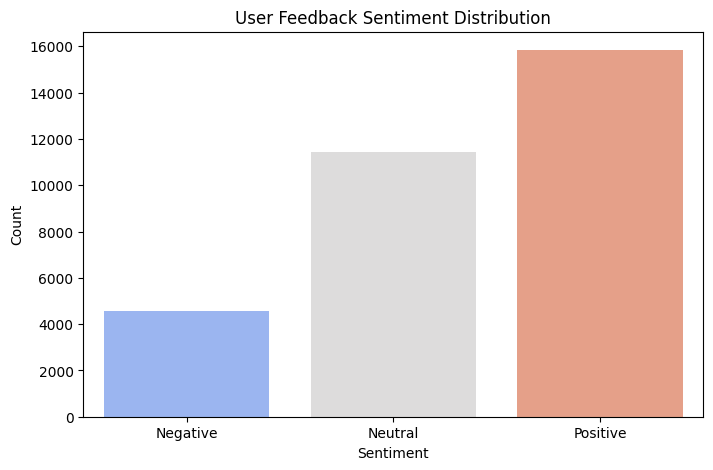

In [17]:
# Step 7: Visualize Sentiment Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment Category', data=df, palette='coolwarm')
plt.title('User Feedback Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [18]:
# Step 8: Save Processed Data
df.to_csv('processed_feedback.csv', index=False)
print("Sentiment analysis completed and saved!")


Sentiment analysis completed and saved!
